# ทำนายคะแนนต่ำสุด วิศวะ จุฬา TCAS รอบ 3 (รุ่น Dek63)
_โดย พี่เกรท ออนดีมานด์_

โจทย์: ทำนายคะแนนต่ำสุด สอบติดวิศวะ จุฬา TCAS รอบ 3 ด้วย Machine Learning Models

> **Disclaimer:** การวิเคราะห์นี้ ทำด้วยข้อมูลเท่าที่หาได้จากเว็บไซต์ สทศ ซึ่งมีข้อมูลย้อนหลังถึงปี 2553 ที่เริ่มมีการสอบ GAT/PAT อีกทั้งเราไม่เอาคะแนนปี 53-54 มาคิดเพราะเกณฑ์การรับมี GPAX ด้วย ต่างจากปี 55 เป็นต้นไป ที่ใช้คะแนน GAT/PAT เพียงอย่างเดียว ดังนั้น จำนวนจุดของข้อมูลจึงมีจำกัดมากๆ อาจทำให้คะแนนที่ทำนายออกมา มีความแม่นยำที่ลดลง อย่างไรก็ตาม พี่จะทำนายแล้วระบุความคลาดเคลื่อนเอาไว้ให้ด้วยครับ

## TL;DR

จากการทำนายด้วยโมเดล Linear Regression พบว่า คะแนนทำนายต่ำสุดเพื่อสอบติด วิศวะ จุฬา TCAS รอบ 3 ปี 2563 โดยใช้ข้อมูลปี 2555-2562 คือ

> ### 19,196 ± 469 คะแนน

ข้อสรุปจากการวิเคราะห์
- คะแนนปีนี้ มีแนวโน้ม **เฟ้อ**มากกว่าทุกปีที่ผ่านมา (สังเกตเบื้องต้นได้จากจำนวนคนทำ PAT1 ได้เกิน 120 ที่เพิ่มขึ้นจากปีก่อนๆ ถึงเท่าตัว)
- คะแนนปีนี้ มีแนวโน้มใกล้เคียงคะแนนปี **2556** และ **2558**
- น้องที่มีคะแนนในช่วง 19,0XX มีสิทธิ์ลุ้นสอบติดนะครับ (แม้แต่หากน้องได้ 18,0XX ก็ควรลองยื่นเป็นอันดับ 1 ดูครับ) เพราะรอบนี้มี กสพท อยู่ด้วย น้องที่ยื่นกสพทที่คะแนนสูงๆ อาจจะไม่สละโควต้ามากันที่วิศวะ จุฬา ครับ
- แต่พี่ขอย้ำอีกทีนะครับว่า คะแนนทำนายนี้ เป็นเพียงคะแนนทำนายเท่านั้น ทำให้อาจมีปัจจัยอื่นที่โมเดลไม่ได้คำนึงถึงครับ

ทั้งนี้ การเลือกคณะ พี่แนะนำให้น้องเลือกด้วยหลักการดังนี้นะครับ

- **อันดับ 1:** เลือกตามความอยากเลยโดยไม่ต้องแคร์คะแนนที่น้องได้ จะได้ไม่คาใจครับ
- **อันดับ 2-3:** คะแนนของน้อง อยู่ในช่วงค่าต่ำสุดที่สอบติดของ 3 ปีย้อนหลัง
- **อันดับ 4-5:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 1500 คะแนน (สเกลเต็ม 30000)
- **อันดับ 6:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 3000 คะแนน (สเกลเต็ม 30000)

และน้องสามารถวิเคราะห์คะแนนและดูสถิติเพิ่มเติม ได้ที่แอพพลิเคชั่น TCASter (https://tcaster.net/) หรือติดตามข่าวสารได้ที่ Facebook Fanpage (https://www.facebook.com/TCASterApp/) ครับ

แล้วก็ เดี๋ยวพี่จะวิเคราะห์คะแนน กสพท ให้ด้วย รอติดตามได้ทาง Instagram ของพี่ ที่ https://www.instagram.com/pgreatondemand นะครับ

ขอให้น้องๆ สอบติดได้ตามที่ตั้งใจไว้นะ :-)

## Data Import

**หมายเหตุ** ข้อมูลคะแนนต่ำสุดติดวิศวะจุฬา ปี 2561 มีรอบ 3/1 และ 3/2 ในที่นี้เราใช้ค่าเฉลี่ยของสองค่านี้ เพราะ 3/1 (20570) นั้นเป็นค่าที่เฟ้อเกินจริง และรอบ 3/2 (17030) เป็นค่าที่ต่ำเกินจริงเพราะหลายคนที่คะแนนสูงในรอบ 3/1 ไม่กล้าสละสิทธิ์มารอบ 3/2 (ขอบคุณน้อง @newwpongg ที่เสนอแนะใน ig มา ณ ที่นี้ครับ)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('engcuraw63_05.csv', index_col=0)

In [2]:
df.head()

,Round,CU_R3_Min,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,...,PAT1_210,PAT1_240,PAT1_270,PAT3_90,PAT3_120,PAT3_150,PAT3_180,PAT3_210,PAT3_240,PAT3_270
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,16465.0,800,284735,200693,39488,130.59,68.04,39.64,20.07,...,73,22,4,7622,2512,1097,505,176,28,0
2556,1,19100.0,800,323876,243834,51235,114.30,60.63,40.61,20.96,...,128,29,14,9958,4463,2305,1337,767,298,8
2557,1,18552.0,600,237419,173708,35302,143.58,61.60,57.40,24.13,...,98,25,8,11207,3976,1803,808,415,135,13
2558,1,19090.0,610,316791,239345,49776,131.97,63.81,51.56,18.85,...,42,18,3,11124,4429,2079,1193,686,330,35
2559,1,17510.0,610,324856,253213,57879,115.66,58.73,52.61,21.64,...,164,63,18,9171,2816,1340,683,330,82,5


In [3]:
X = df.drop('CU_R3_Min', axis=1)
y = df[['CU_R3_Min']]

In [4]:
X

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,PAT1_210,PAT1_240,PAT1_270,PAT3_90,PAT3_120,PAT3_150,PAT3_180,PAT3_210,PAT3_240,PAT3_270
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,73,22,4,7622,2512,1097,505,176,28,0
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,128,29,14,9958,4463,2305,1337,767,298,8
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,98,25,8,11207,3976,1803,808,415,135,13
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,42,18,3,11124,4429,2079,1193,686,330,35
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,164,63,18,9171,2816,1340,683,330,82,5
2560,1,590,289866,228522,50623,123.93,58.48,42.82,25.34,95.91,...,334,128,79,15502,4665,1858,932,563,199,24
2561,1,610,230566,177835,37347,144.65,67.82,48.45,26.13,92.32,...,243,113,36,7348,2944,1649,979,582,320,52
2562,1,430,215585,163251,34493,144.06,66.90,49.05,29.68,90.81,...,359,141,49,7708,2754,1270,730,429,129,4
2563,1,400,202341,150694,33147,147.50,63.43,62.90,38.08,98.21,...,937,677,375,9341,3381,1567,880,475,114,10


In [5]:
y

,CU_R3_Min
Year,
2555,16465.0
2556,19100.0
2557,18552.0
2558,19090.0
2559,17510.0
2560,18870.0
2561,18880.0
2562,18360.0
2563,NaN


# Exploratory Data Analysis

- ดูแนวโน้มค่าเฉลี่ยคะแนนรวมถ่วงน้ำหนักที่คิดจาก GAT 20%, PAT1 20% และ PAT3 60% ของปี 55-63 (ไม่เอาปี 53-54 เพราะใช้คนละเกณฑ์) เทียบคะแนนต่ำสุดที่ติดวิศวะ จุฬา TCAS รอบ 3 (รับตรง)
- วิเคราะห์คะแนนของคนที่ได้ GAT 150up, PAT1 Top 1500 และ PAT3 Top 1000 (สมมติฐานคะแนนของกลุ่มคนที่มีลุ้นสอบติดวิศวะ จุฬา)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## แนวโน้มค่าเฉลี่ยคะแนน

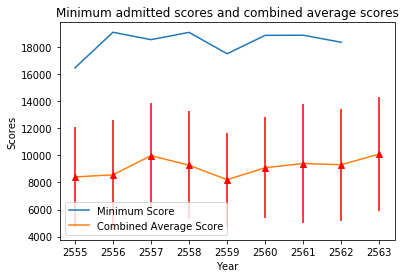

In [7]:
plt.plot(y.index, y.CU_R3_Min, y.index, X.Total_avg)
plt.errorbar(y.index, X.Total_avg, yerr=X.Total_std, fmt='r^')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['Minimum Score','Combined Average Score'])
plt.title('Minimum admitted scores and combined average scores')
plt.show()

เราจะเห็นว่า ค่าเฉลี่ยของคะแนน ไม่ใช่ตัวทำนายที่ดีนัก เพราะแนวโน้มไม่ได้สอดคล้องกับคะแนนต่ำสุดที่ติดวิศวะจุฬาจริง และยังมีส่วนเบี่ยงเบนมาตรฐานที่ใหญ่มากอีกด้วย

## แนวโน้มคะแนนของกลุ่มคะแนนมีโอกาสสอบติดจริง
สมมติฐาน: น้องที่จะสอบติดวิศวะจุฬา คือกลุ่มที่ได้คะแนนค่อนข้างสูง กล่าวคือ
- GAT > 150 และ 180
- PAT1 Top 1000, 1500 และ Top 2000 (อาจมีหลายคน ไปยื่นหมอ) หรือ PAT1 > 120 และ 150
- PAT3 Top 800, 1000 และ Top 1200 หรือ PAT3 > 150 และ 180

ดังนั้น เราจะเอาค่าสถิติของคนกลุ่มนี้ มาวิเคราะห์ดูแนวโน้ม

In [8]:
MAX_SCORE = 300
SCORE_BIN = 30

def get_top(X_range, exam_name, top_N=1000):
    ''' A method to get the (approximate) score of top_N'th student
    INPUT : X_range (DataFrame) - Score range dataframe of a single year
            exam_name (str) - name of interested exam
            top_N - the interested rank
    OUTPUT: top_N_score (float) - the score of rank top_N
    '''
    current_rank = 0
    current_range = MAX_SCORE - SCORE_BIN
    while True:
        N_stu = X_range[exam_name+'_'+str(current_range)] #Number of students in this score range
        if (current_rank + N_stu) < top_N:
            current_rank += N_stu
            current_range -= SCORE_BIN
        else:
            top_N_score = current_range + SCORE_BIN*((current_rank + N_stu) - top_N)/N_stu
            return top_N_score

In [9]:
X['PAT1_top1000'] = X.apply(lambda row: get_top(row, 'PAT1', top_N=1000), axis=1)
X['PAT1_top1500'] = X.apply(lambda row: get_top(row, 'PAT1', top_N=1500), axis=1)
X['PAT1_top2000'] = X.apply(lambda row: get_top(row, 'PAT1', top_N=2000), axis=1)

In [10]:
X['PAT3_top800'] = X.apply(lambda row: get_top(row, 'PAT3', top_N=800), axis=1)
X['PAT3_top1000'] = X.apply(lambda row: get_top(row, 'PAT3', top_N=1000), axis=1)
X['PAT3_top1200'] = X.apply(lambda row: get_top(row, 'PAT3', top_N=1200), axis=1)

In [11]:
X.head()

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,PAT3_180,PAT3_210,PAT3_240,PAT3_270,PAT1_top1000,PAT1_top1500,PAT1_top2000,PAT3_top800,PAT3_top1000,PAT3_top1200
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,505,176,28,0,146.936275,134.681373,122.426471,177.511395,172.041933,166.572470
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,1337,767,298,8,158.438819,144.256541,134.684110,220.677966,212.855280,207.150337
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,808,415,135,13,166.177862,151.986755,145.188363,201.200495,193.774752,186.349010
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,1193,686,330,35,140.198276,127.267241,118.688099,220.976676,212.230321,206.253143
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,683,330,82,5,168.134328,152.142857,144.111514,193.177160,184.392387,177.761194


In [12]:
def get_weighted_avg(X_range, exam_name, limit_score=150):
    ''' A method to get the weighted average score given a min score
    INPUT : X_range (DataFrame) - Score range dataframe of a single year
            exam_name (str) - - name of interested exam
            min_score (int) - the lower bound of interested range, MUST be in [90,120,150,180,210,240,270]
    OUTPUT: weighted_score (float) - the weighted score above the limit_score
            total_students (int) - number of students above the limit_score
    '''
    score_ranges = np.arange(limit_score, MAX_SCORE, SCORE_BIN).astype(int)
    grand_total = 0
    total_students = 0
    for current_range in score_ranges:
        grand_total += X_range[exam_name+'_'+str(current_range)]*(current_range + 0.5*SCORE_BIN)
        total_students += X_range[exam_name+'_'+str(current_range)]
    
    weighted_score = grand_total/total_students
    return weighted_score, int(total_students)

In [13]:
X['GAT_150up_avg'], X['GAT_150up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'GAT', limit_score=150), axis=1))
X['GAT_180up_avg'], X['GAT_180up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'GAT', limit_score=180), axis=1))

X['PAT1_120up_avg'], X['PAT1_120up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT1', limit_score=120), axis=1))
X['PAT1_150up_avg'], X['PAT1_150up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT1', limit_score=150), axis=1))

X['PAT3_150up_avg'], X['PAT3_150up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT3', limit_score=150), axis=1))
X['PAT3_180up_avg'], X['PAT3_180up_N'] = zip(*X.apply(lambda row: get_weighted_avg(row, 'PAT3', limit_score=180), axis=1))

In [14]:
X

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,GAT_180up_avg,GAT_180up_N,PAT1_120up_avg,PAT1_120up_N,PAT1_150up_avg,PAT1_150up_N,PAT3_150up_avg,PAT3_150up_N,PAT3_180up_avg,PAT3_180up_N
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,215.665682,81946,154.051929,2099,180.702857,875,180.631229,1806,204.816643,709
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,204.968836,113914,155.784243,2767,182.925000,1200,189.159067,4715,212.265560,2410
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,234.833267,158877,150.913903,4251,178.089172,1570,184.801512,3174,210.842451,1371
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,214.336016,87969,150.631668,1781,179.830918,621,190.641915,4323,214.398396,2244
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,209.616345,54463,155.196130,3773,183.627951,1567,184.782787,2440,208.881818,1100
2560,1,590,289866,228522,50623,123.93,58.48,42.82,25.34,95.91,...,208.129543,56954,164.699929,4199,191.841386,2194,188.078859,3576,213.038417,1718
2561,1,610,230566,177835,37347,144.65,67.82,48.45,26.13,92.32,...,214.119805,83152,160.024355,4106,187.882141,1943,192.730318,3582,216.386446,1933
2562,1,430,215585,163251,34493,144.06,66.90,49.05,29.68,90.81,...,221.897004,70983,161.184258,5590,187.424785,2792,188.313817,2562,211.230650,1292
2563,1,400,202341,150694,33147,147.50,63.43,62.90,38.08,98.21,...,216.812133,68080,173.112528,10273,199.332895,6086,186.785949,3046,209.868154,1479


เราจะดูคะแนนรวม 2 แบบ ว่าแบบไหนสอดคล้อง Trend คะแนนต่ำสุดที่ติดมากกว่า
- แบบ O: `(20% GAT150up_avg + 20% PAT1_120up_avg + 60% PAT3_150up_avg) * 100 (เต็ม 30000)`
- แบบ AX-CZ: `(20% GAT150up_avg + 20% PAT1topABC + 60% PAT3topXYZ) * 100 (เต็ม 30000)`

In [15]:
X['Combined_O'] = (0.2*X['GAT_150up_avg'] + 0.2*X['PAT1_120up_avg'] + 0.6*X['PAT3_150up_avg'])*100

In [16]:
exams = ['PAT1', 'PAT3']
pat1_top = [('1000', 'A'), ('1500', 'B'), ('2000', 'C')]
pat3_top = [('800', 'X'), ('1000', 'Y'), ('1200', 'Z')]

for i, t1 in pat1_top:
    for j, t3 in pat3_top:
        X['Combined_'+t1+t3] = (0.2*X['GAT_150up_avg'] + 0.2*X['PAT1_top'+i] + 0.6*X['PAT3_top'+j])*100

In [17]:
X

,Round,Quota,GAT_N,PAT1_N,PAT3_N,GAT_avg,GAT_std,PAT1_avg,PAT1_std,PAT3_avg,...,Combined_O,Combined_AX,Combined_AY,Combined_AZ,Combined_BX,Combined_BY,Combined_BZ,Combined_CX,Combined_CY,Combined_CZ
Year,,,,,,,,,,,,,,,,,,,,,
2555,1,800,284735,200693,39488,130.59,68.04,39.64,20.07,83.45,...,17905.798661,17576.295490,17248.127760,16919.960030,17331.197451,17003.029721,16674.861991,17086.099412,16757.931682,16429.763951
2556,1,800,323876,243834,51235,114.30,60.63,40.61,20.96,91.11,...,18368.632196,20312.857668,19843.496521,19501.199896,20029.212120,19559.850972,19217.554348,19837.763492,19368.402344,19026.105720
2557,1,600,237419,173708,35302,143.58,61.60,57.40,24.13,99.40,...,18496.010957,19785.229108,19339.684554,18894.139999,19501.406970,19055.862416,18610.317861,19365.439122,18919.894567,18474.350013
2558,1,610,316791,239345,49776,131.97,63.81,51.56,18.85,93.41,...,18434.291015,20045.708843,19520.927502,19162.296860,19787.088153,19262.306812,18903.676170,19615.505306,19090.723965,18732.093323
2559,1,610,324856,253213,57879,115.66,58.73,52.61,21.64,80.66,...,18004.945247,18767.371569,18240.285185,17842.413635,18447.542145,17920.455761,17522.584211,18286.915283,17759.828899,17361.957349
2560,1,590,289866,228522,50623,123.93,58.48,42.82,25.34,95.91,...,18338.902464,20070.276580,19684.010485,19297.744391,19726.706501,19340.440407,18954.174313,19443.152626,19056.886532,18670.620437
2561,1,610,230566,177835,37347,144.65,67.82,48.45,26.13,92.32,...,18709.715770,20566.784947,20005.920189,19638.198024,20277.767606,19716.902848,19349.180683,20005.886869,19445.022111,19077.299946
2562,1,430,215585,163251,34493,144.06,66.90,49.05,29.68,90.81,...,18618.572062,19948.408555,19455.257870,18962.107186,19628.431596,19135.280911,18642.130226,19427.493887,18934.343202,18441.192517
2563,1,400,202341,150694,33147,147.50,63.43,62.90,38.08,98.21,...,18633.326778,20998.868600,20589.777691,20180.686782,20665.909929,20256.819020,19847.728111,20348.552159,19939.461250,19530.370340


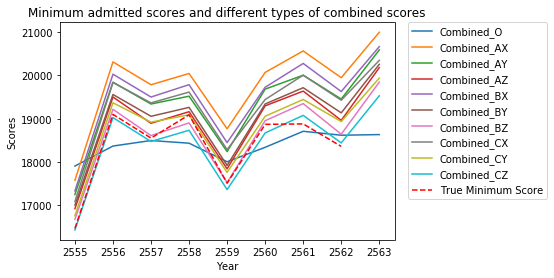

In [22]:
plt.plot(X.index, X.Combined_O)

legends = []

for _, t1 in pat1_top:
    for _, t3 in pat3_top:
        plt.plot(X.index, X['Combined_'+t1+t3])
        legends.append('Combined_'+t1+t3)

plt.plot(X.index, y.CU_R3_Min, linestyle='dashed', color='red')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.legend(['Combined_O']+legends+['True Minimum Score'], bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.title('Minimum admitted scores and different types of combined scores')
plt.show()

ข้อสังเกต
- การคิดด้วยค่าเฉลี่ยถ่วงน้ำหนักอย่างเดียว (แบบ O) แทบใช้ในการทำนายไม่ได้เลย
- การคิดด้วยแบบจำลอง AX ถึง CZ ต่างทำนาย "แนวโน้มการขึ้นลง" ได้ค่อนข้างตรงกับของจริง แปลว่ามีโอกาสสูงที่ปี 2563 คะแนนจะดีดตัวขึ้นมาจากปีที่แล้ว
- สังเกตว่าปี 2561 นั้น โมเดลทั้งหมดทำนายสูงกว่าค่าจริง ทั้งนี้เพราะปี 61 นั้น มีรอบ 3/1 และ 3/2 ซึ่งรอบ 3/2 เป็นตัวฉุดคะแนนสอบติดให้ต่ำลงมา (น้องนักเรียนคะแนนต่ำกล้าเสี่ยงสละรอบ 3/1 มายื่นใมห่แล้วติดจริง) แต่ทั้งนี้ จะยังเก็บตัวเลขปี 2561 ไว้เพื่อป้องกันโมเดลไม่ให้ overfit มากจนเกินไป

จากนี้เราจะลองสร้าง Linear Learning Algorithms ขึ้นมาเพื่อทำนายคะแนนต่ำสุดในปีนี้

In [23]:
X.columns

Index(['Round', 'Quota', 'GAT_N', 'PAT1_N', 'PAT3_N', 'GAT_avg', 'GAT_std',
       'PAT1_avg', 'PAT1_std', 'PAT3_avg', 'PAT3_std', 'Total_avg',
       'Total_std', 'GAT_90', 'GAT_120', 'GAT_150', 'GAT_180', 'GAT_210',
       'GAT_240', 'GAT_270', 'PAT1_90', 'PAT1_120', 'PAT1_150', 'PAT1_180',
       'PAT1_210', 'PAT1_240', 'PAT1_270', 'PAT3_90', 'PAT3_120', 'PAT3_150',
       'PAT3_180', 'PAT3_210', 'PAT3_240', 'PAT3_270', 'PAT1_top1000',
       'PAT1_top1500', 'PAT1_top2000', 'PAT3_top800', 'PAT3_top1000',
       'PAT3_top1200', 'GAT_150up_avg', 'GAT_150up_N', 'GAT_180up_avg',
       'GAT_180up_N', 'PAT1_120up_avg', 'PAT1_120up_N', 'PAT1_150up_avg',
       'PAT1_150up_N', 'PAT3_150up_avg', 'PAT3_150up_N', 'PAT3_180up_avg',
       'PAT3_180up_N', 'Combined_O', 'Combined_AX', 'Combined_AY',
       'Combined_AZ', 'Combined_BX', 'Combined_BY', 'Combined_BZ',
       'Combined_CX', 'Combined_CY', 'Combined_CZ'],
      dtype='object')

## Data Preprocessing and Feature Engineering
ในส่วนนี้ เราจะมาเตรียม data ให้พร้อมสำหรับโมเดล Machine Learning และเลือก Feature ที่คาดว่าจะทำให้ทำนายผลได้แม่นยำขึ้น

Baseline Model
- `PAT3_150up_N`, `GAT_150up_avg`,`PAT1_top1000` และ `PAT3_top800` โดยให้โมเดลเลือก coefficients เอาเอง

Engineered Models
- `PAT3_150up_N` จำนวนคนได้ PAT3 เกิน 150
- `Combined_AX` `Combined_BY` หรือ `Combined_CZ` โดยเลือกทีละอัน ดูว่าแบบไหนให้ผลลัพธ์ที่คลาดเคลื่อนน้อยที่สุด

In [26]:
BL_features = ['PAT3_150up_N', 'GAT_150up_avg','PAT1_top1000','PAT3_top800']
AX_features = ['PAT3_150up_N', 'Combined_AX']
BY_features = ['PAT3_150up_N', 'Combined_BY']
CZ_features = ['PAT3_150up_N', 'Combined_CZ']

In [27]:
X_BL = X[BL_features]
X_AX = X[AX_features]
X_BY = X[BY_features]
X_CZ = X[CZ_features]

In [28]:
X_BL

,PAT3_150up_N,GAT_150up_avg,PAT1_top1000,PAT3_top800
Year,,,,
2555,1806,199.344316,146.936275,177.511395
2556,4715,195.170167,158.438819,220.677966
2557,3174,219.482108,166.177862,201.200495
2558,4323,199.157137,140.198276,220.976676
2559,2440,190.702771,168.134328,193.177160
2560,3576,188.008617,186.857143,209.549356
2561,3582,197.270479,177.254335,217.938144
2562,2562,204.802894,191.960000,200.219178
2563,3046,198.195965,242.304284,203.147727


In [29]:
def standardized(X_raw):
    # Standardized features
    return (X_raw - X_raw.mean())/(X_raw.std())

In [34]:
CURRENT_YEAR = 2563

def get_train_test(X_raw):
    X_st = standardized(X_raw)
    X_train = X_st.drop([CURRENT_YEAR])
    X_test = X_st.loc[[CURRENT_YEAR]]
    return X_train, X_test

In [35]:
X_train_BL, X_test_BL = get_train_test(X_BL)
X_train_AX, X_test_AX = get_train_test(X_AX)
X_train_BY, X_test_BY = get_train_test(X_BY)
X_train_CZ, X_test_CZ = get_train_test(X_CZ)

In [36]:
X_train_BL

,PAT3_150up_N,GAT_150up_avg,PAT1_top1000,PAT3_top800
Year,,,,
2555,-1.565876,0.024009,-0.937182,-1.923899
2556,1.594972,-0.435149,-0.557954,1.104653
2557,-0.079441,2.239178,-0.302805,-0.261880
2558,1.169034,0.003420,-1.159328,1.125610
2559,-0.876987,-0.926565,-0.238302,-0.824794
2560,0.357363,-1.222924,0.378972,0.323873
2561,0.363882,-0.204114,0.062376,0.912428
2562,-0.744425,0.624456,0.547209,-0.330729


In [37]:
X_test_BL

,PAT3_150up_N,GAT_150up_avg,PAT1_top1000,PAT3_top800
Year,,,,
2563,-0.218522,-0.10231,2.207014,-0.125263


In [39]:
y_train = y.drop([CURRENT_YEAR])

In [40]:
y_train

,CU_R3_Min
Year,
2555,16465.0
2556,19100.0
2557,18552.0
2558,19090.0
2559,17510.0
2560,18870.0
2561,18880.0
2562,18360.0


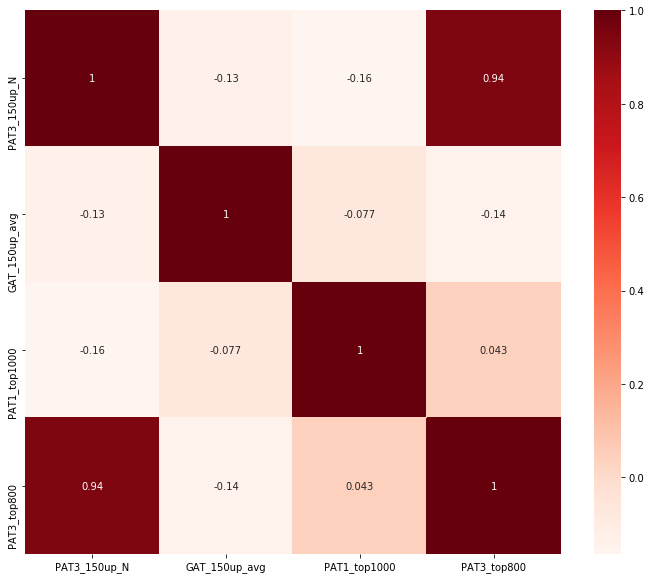

In [44]:
# Pearson Correlation for baseline features
plt.figure(figsize=(12,10))
cor = X_train_BL.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Model Selection and Training
ต่อจากนี้ เราจะเริ่มทำการหาโมเดล Machine Learning ที่จะทำนายคะแนนต่ำสุดที่ติดวิศวะ จุฬา รอบ 3
เนื่องจากจำนวน data points ที่น้อยมาก เราจึงควรเลือก Linear Model เท่านั้นเพื่อป้องกันการ overfit
ทั้งนี้ จะเลือกโมเดลที่เรียบง่ายที่สุดอย่าง Linear Regression ก่อน

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

In [52]:
# Calculate the scores for all types of X_train's
X_train_all = [(X_train_BL,'BL'), (X_train_AX,'AX'), (X_train_BY,'BY'), (X_train_CZ,'CZ')]
mae_scores = []

for X_train, model_name in X_train_all:
    scores = cross_val_score(LinearRegression(), X_train, y_train.values.ravel(), cv=3, scoring='neg_mean_absolute_error')
    mae = - scores.mean()
    print('The mean mae for Model {:<30} is {:>10.3f}'.format(model_name, mae))
    mae_scores.append(mae)

The mean mae for Model BL                             is    398.151
The mean mae for Model AX                             is    225.545
The mean mae for Model BY                             is    236.805
The mean mae for Model CZ                             is    233.951


พบว่า โมเดล AX แม่นยำสุดในเบื้องต้น แต่ในการ report ความคลาดเคลื่อนตอนสุดท้าย เราจะรายงานความคลาดเคลื่อนที่มากที่สุดที่เป็นไปได้

### Define helper functions

In [66]:
def get_predictions(X_train, X_test, y_train, cv=3):
    CV_results = cross_validate(LinearRegression(), X_train, y_train, cv=cv, scoring='neg_mean_absolute_error',
                                return_estimator=True)
    model_CV = CV_results['estimator']
    
    predictions = []
    for estimator in model_CV:
        train_preds = estimator.predict(X_train)
        test_preds = estimator.predict(X_test)
        predictions.append(np.append(train_preds,test_preds))
    
    return CV_results, predictions

In [57]:
def plot_predictions(predictions, y_train, model_name):
    for i in range(len(predictions)):
        plt.plot(np.arange(2555,CURRENT_YEAR+1), predictions[i])
    plt.plot(np.arange(2555,CURRENT_YEAR), y_train.values.ravel(), linestyle='dashed')
    plt.xticks(np.arange(2555,CURRENT_YEAR+1))
    plt.legend(['Model {}'.format(i) for i in range(len(predictions))] + ['True Minimum Score'])
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.title('Chula Engineering TCAS 3 Score Predictions with Linear Regression (Model '+model_name+')')
    plt.show()

### Linear Regression (Baseline)

In [67]:
BL_CV_results, BL_predictions = get_predictions(X_train_BL, X_test_BL, y_train)

In [68]:
BL_CV_results

{'fit_time': array([0.00299335, 0.00198412, 0.00199533]),
 'score_time': array([0.00200295, 0.00099754, 0.00199628]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'test_score': array([-469.08862586, -269.08656128, -456.27753592])}

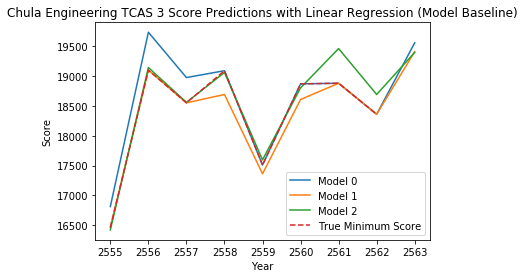

In [69]:
plot_predictions(BL_predictions, y_train, 'Baseline')

เราจะเก็บความคลาดเคลื่อนที่มากที่สุดของ Baseline Model เอาไว้เพื่อรายงานผลความคลาดเคลื่อน

In [89]:
max_mae_baseline = max(np.abs(BL_CV_results['test_score']))

In [90]:
max_mae_baseline

469.0886258618157

### Linear Regression (Model AX)

In [70]:
AX_CV_results, AX_predictions = get_predictions(X_train_AX, X_test_AX, y_train)

In [71]:
AX_CV_results

{'fit_time': array([0.00300384, 0.00199509, 0.00199771]),
 'score_time': array([0.00098634, 0.00199413, 0.00199223]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'test_score': array([-196.91978723, -161.23342475, -318.48303952])}

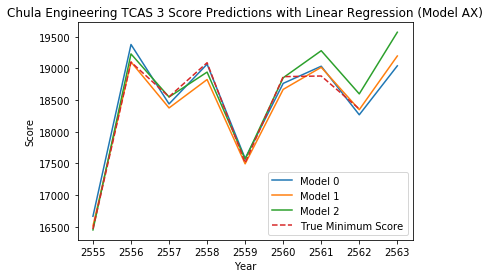

In [72]:
plot_predictions(AX_predictions, y_train, 'AX')

### Linear Regression (Model BY)

In [73]:
BY_CV_results, BY_predictions = get_predictions(X_train_BY, X_test_BY, y_train)

In [74]:
BY_CV_results

{'fit_time': array([0.00249863, 0.00199485, 0.00199437]),
 'score_time': array([0.00100541, 0.00099778, 0.00099802]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'test_score': array([-226.06603553, -207.8639593 , -276.48645646])}

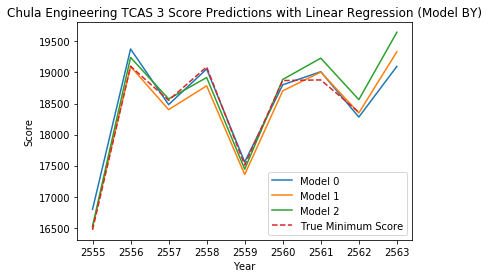

In [75]:
plot_predictions(BY_predictions, y_train, 'BY')

### Linear Regression (Model CZ)

In [76]:
CZ_CV_results, CZ_predictions = get_predictions(X_train_CZ, X_test_CZ, y_train)

In [77]:
CZ_CV_results

{'fit_time': array([0.00297785, 0.00298691, 0.00299978]),
 'score_time': array([0.00100255, 0.00199437, 0.00198698]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'test_score': array([-210.94426332, -217.55739979, -273.35042944])}

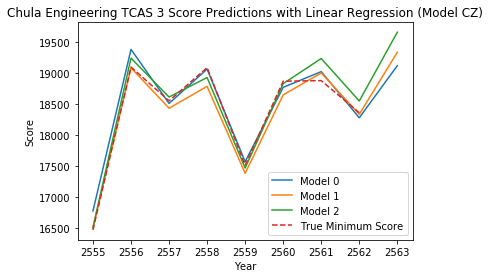

In [78]:
plot_predictions(CZ_predictions, y_train, 'CZ')

### รายงานผล

Model 1 ของการคิดด้วย Combined AX (PAT1_top1000, PAT3_top800) มีความคลาดเคลื่อนต่ำที่สุด

In [79]:
print("คะแนนทำนายต่ำสุด วิศวะ จุฬา = {:.2f}".format(AX_predictions[1][-1]))

คะแนนทำนายต่ำสุด วิศวะ จุฬา = 19195.82


In [83]:
all_predictions = [(BL_predictions, 'Baseline'), (AX_predictions,'AX'), (BY_predictions,'BY'), (CZ_predictions,'CZ')]

max_score = 0
min_score = 30000

for preds, model_name in all_predictions:
    for i in [0, 1, 2]:
        predict_test_score = preds[i][-1]
        max_score = max(max_score, predict_test_score)
        min_score = min(min_score, predict_test_score)
        print("คะแนนทำนายต่ำสุดปี {} ของโมเดล {:<10} แบบที่ {} = {:.2f}".format(CURRENT_YEAR, model_name,
                                                                            i, predict_test_score))

คะแนนทำนายต่ำสุดปี 2563 ของโมเดล Baseline   แบบที่ 0 = 19557.07
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล Baseline   แบบที่ 1 = 19409.60
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล Baseline   แบบที่ 2 = 19396.30
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล AX         แบบที่ 0 = 19040.56
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล AX         แบบที่ 1 = 19195.82
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล AX         แบบที่ 2 = 19570.82
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล BY         แบบที่ 0 = 19098.21
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล BY         แบบที่ 1 = 19334.39
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล BY         แบบที่ 2 = 19647.63
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล CZ         แบบที่ 0 = 19120.45
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล CZ         แบบที่ 1 = 19337.92
คะแนนทำนายต่ำสุดปี 2563 ของโมเดล CZ         แบบที่ 2 = 19661.91


รายงานคะแนนทำนายดังนี้

> #### คะแนน Model ที่แม่นยำที่สุด ± ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์มากสุด (ของ Baseline Model)

In [91]:
model_score = AX_predictions[1][-1]
confidence_int = max_mae_baseline

print("คะแนนทำนายต่ำสุด วิศวะ จุฬา = {:.2f} ± {:.2f}".format(model_score, confidence_int))

คะแนนทำนายต่ำสุด วิศวะ จุฬา = 19195.82 ± 469.09


## สรุปผลการวิเคราะห์

จากการทำนายด้วยโมเดล Linear Regression พบว่า คะแนนทำนายต่ำสุดเพื่อสอบติด วิศวะ จุฬา TCAS รอบ 3 ปี 2563 โดยใช้ข้อมูลปี 2555-2562 คือ

> ### 19,196 ± 469 คะแนน

ข้อสรุปจากการวิเคราะห์
- คะแนนปีนี้ มีแนวโน้ม **เฟ้อ**มากกว่าทุกปีที่ผ่านมา (สังเกตเบื้องต้นได้จากจำนวนคนทำ PAT1 ได้เกิน 120 ที่เพิ่มขึ้นจากปีก่อนๆ ถึงเท่าตัว)
- คะแนนปีนี้ มีแนวโน้มใกล้เคียงคะแนนปี **2556** และ **2558**
- น้องที่มีคะแนนในช่วง 19,0XX มีสิทธิ์ลุ้นสอบติดนะครับ (แม้แต่หากน้องได้ 18,0XX ก็ควรลองยื่นเป็นอันดับ 1 ดูครับ) เพราะรอบนี้มี กสพท อยู่ด้วย น้องที่ยื่นกสพทที่คะแนนสูงๆ อาจจะไม่สละโควต้ามากันที่วิศวะ จุฬา ครับ
- แต่พี่ขอย้ำอีกทีนะครับว่า คะแนนทำนายนี้ เป็นเพียงคะแนนทำนายเท่านั้น ทำให้อาจมีปัจจัยอื่นที่โมเดลไม่ได้คำนึงถึงครับ

ทั้งนี้ การเลือกคณะ พี่แนะนำให้น้องเลือกด้วยหลักการดังนี้นะครับ

- **อันดับ 1:** เลือกตามความอยากเลยโดยไม่ต้องแคร์คะแนนที่น้องได้ จะได้ไม่คาใจครับ
- **อันดับ 2-3:** คะแนนของน้อง อยู่ในช่วงค่าต่ำสุดที่สอบติดของ 3 ปีย้อนหลัง
- **อันดับ 4-5:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 1500 คะแนน (สเกลเต็ม 30000)
- **อันดับ 6:** คะแนนของน้อง เกินคะแนนต่ำสุดที่สอบติดของ 3 ปี ย้อนหลัง อย่างน้อย 3000 คะแนน (สเกลเต็ม 30000)

และน้องสามารถวิเคราะห์คะแนนและดูสถิติเพิ่มเติม ได้ที่แอพพลิเคชั่น TCASter (https://tcaster.net/) หรือติดตามข่าวสารได้ที่ Facebook Fanpage (https://www.facebook.com/TCASterApp/) ครับ

แล้วก็ เดี๋ยวพี่จะวิเคราะห์คะแนน กสพท ให้ด้วย รอติดตามได้ทาง Instagram ของพี่ ที่ https://www.instagram.com/pgreatondemand นะครับ

ขอให้น้องๆ สอบติดได้ตามที่ตั้งใจไว้นะ :-)

_- พี่เกรท ออนดีมานด์_

## สิ่งที่อาจทำเพิ่ม ถ้ามีเวลามากขึ้น

- เลือก Features ใหม่ๆ มาวิเคราะห์ อาจทำให้ทำนายคะแนนได้แม่นยำขึ้น
- อาจลองตัดข้อมูลปี 2561 ทิ้ง
- ลองโมเดลอื่นๆ ดู เช่น อาจลอง Train Neural Network ดู 555 (แต่คง overfit สุดๆ)
- ลองทำนายคะแนนของมหาวิทยาลัยอื่น